In [2]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [4]:
print("No of images in x_train",x_train.shape)
print("No of images in x_test",x_test.shape)

No of images in x_train (50000, 32, 32, 3)
No of images in x_test (10000, 32, 32, 3)


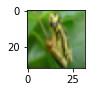

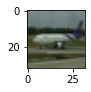

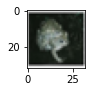

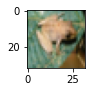

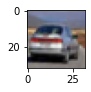

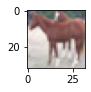

In [5]:
for i in range(232,238):
    plt.subplot(120+1+i)
    img=x_train[i]
    plt.imshow(img)
    plt.show()

In [8]:
#Convert the input into floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalize the data such that the values are betwenn 0 and 1
x_train/=255.0
x_test/=255.0

In [10]:
#One hot encoding
#one hot encode the outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [11]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [13]:
model = Sequential()

#Layer 1
model.add(Convolution2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Layer 2
model.add(Convolution2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Layer 3
model.add(Convolution2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())  #Flattens the previous layer into a huge vector

#Fully connected layer
model.add(Dense(512, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.30))
model.add(Dense(10, activation = 'softmax'))

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
output = model.fit(x_train,y_train, batch_size = 35, epochs = 15, validation_data = (x_test, y_test))

Epoch 1/15
1429/1429 [==============================] - 54s 37ms/step - loss: 1.6324 - accuracy: 0.3976 - val_loss: 1.3171 - val_accuracy: 0.5335
Epoch 2/15
1429/1429 [==============================] - 54s 38ms/step - loss: 1.2702 - accuracy: 0.5467 - val_loss: 1.1654 - val_accuracy: 0.5878
Epoch 3/15
1429/1429 [==============================] - 56s 39ms/step - loss: 1.1376 - accuracy: 0.5985 - val_loss: 0.9957 - val_accuracy: 0.6522
Epoch 4/15
1429/1429 [==============================] - 50s 35ms/step - loss: 1.0652 - accuracy: 0.6238 - val_loss: 0.9755 - val_accuracy: 0.6551
Epoch 5/15
1429/1429 [==============================] - 51s 36ms/step - loss: 1.0022 - accuracy: 0.6471 - val_loss: 0.9006 - val_accuracy: 0.6880
Epoch 6/15
1429/1429 [==============================] - 51s 36ms/step - loss: 0.9756 - accuracy: 0.6583 - val_loss: 0.8968 - val_accuracy: 0.6845
Epoch 7/15
1429/1429 [==============================] - 51s 36ms/step - loss: 0.9348 - accuracy: 0.6725 - val_loss: 0.8565 -

In [16]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.7776 - accuracy: 0.7311


[0.7776423096656799, 0.7311000227928162]

In [36]:
classes=range(0,10)
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#creating a dictionary with names and classes
class_labels=dict(zip(classes,names))
batch_test=x_test[100:109]
labels=np.argmax(y_test[100:109],axis=-1)


In [37]:
predictions=model.predict(batch_test)
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 0 6 8]


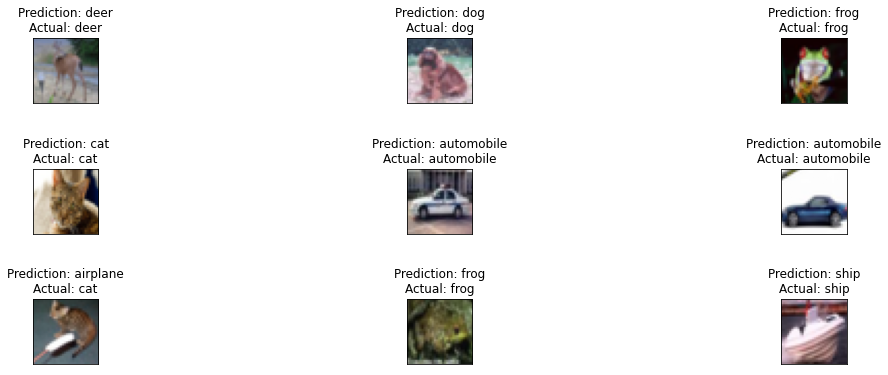

In [38]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()
for i, img in enumerate(batch_test):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img)
    
    
plt.show()